### IMPORTS

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### INPUT AND OUTPUT

In [9]:
# ----- #
# INPUT #
# ----- #
with open('../config/repository_path.txt', 'r') as reader:
    repository_path = reader.read().strip()

results_file = os.path.join(repository_path, 'results', 'representation_simulations.csv')
assert os.path.isfile(results_file)

### Original Data

In [10]:
df = pd.read_csv(results_file)
df.shape

(2100, 39)

### Average Data

In [11]:
average_data= {'N': [],
               'n': [],
               'Representation': [],
               'Effort': []
              }
metrics = ['Precision (training)',
           'Recall (training)',
           'F1-Score (training)',
           'Precision (test)',
           'Recall (test)',
           'F1-Score (test)',
           'Precision (held-out)',
           'Recall (held-out)',
           'F1-Score (held-out)',
          ]
for metric in metrics:
    average_data[metric]=[]
    
for (N,n,representation),auxdf in list(df.groupby(['N', 'n', 'Representation'])):
    average_data['Representation'].append(representation)
    average_data['N'].append(N)
    average_data['n'].append(n)
    
    total_effort=auxdf['Effort'].iloc[0]
    assert len(set(auxdf['Effort']))==1
    average_data['Effort'].append(total_effort)
    
    for metric in metrics:
        assert  len(auxdf[metric])==20
        average_data[metric].append(np.average(auxdf[metric]))
average_df = pd.DataFrame(average_data)
average_df

,N,n,Representation,Effort,Precision (training),Recall (training),F1-Score (training),Precision (test),Recall (test),F1-Score (test),Precision (held-out),Recall (held-out),F1-Score (held-out)
0,291,1,bow,21,0.690909,1.000000,0.813093,0.049062,1.000000,0.093494,0.050000,1.000000,0.095182
1,291,1,glove,21,0.579545,1.000000,0.727508,0.049235,0.999665,0.093805,0.050032,1.000000,0.095241
2,291,1,sbert,21,0.738636,1.000000,0.848582,0.048993,1.000000,0.093367,0.050000,1.000000,0.095182
3,291,3,bow,60,0.674590,1.000000,0.802839,0.047460,1.000000,0.090576,0.050000,1.000000,0.095182
4,291,3,glove,60,0.581571,1.000000,0.732780,0.047853,0.999532,0.091289,0.050049,1.000000,0.095271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5825,10,glove,445,0.450061,0.998800,0.610489,0.070231,0.977302,0.125090,0.087738,0.982263,0.153174
101,5825,10,sbert,445,0.812253,0.989061,0.882353,0.406374,0.867190,0.494966,0.467095,0.899687,0.561863
102,5825,20,bow,810,0.832322,0.990235,0.898188,0.371886,0.776715,0.438360,0.491252,0.863809,0.569457
103,5825,20,glove,810,0.547771,0.992173,0.685397,0.137257,0.934577,0.206670,0.201133,0.958321,0.286348


### Plots

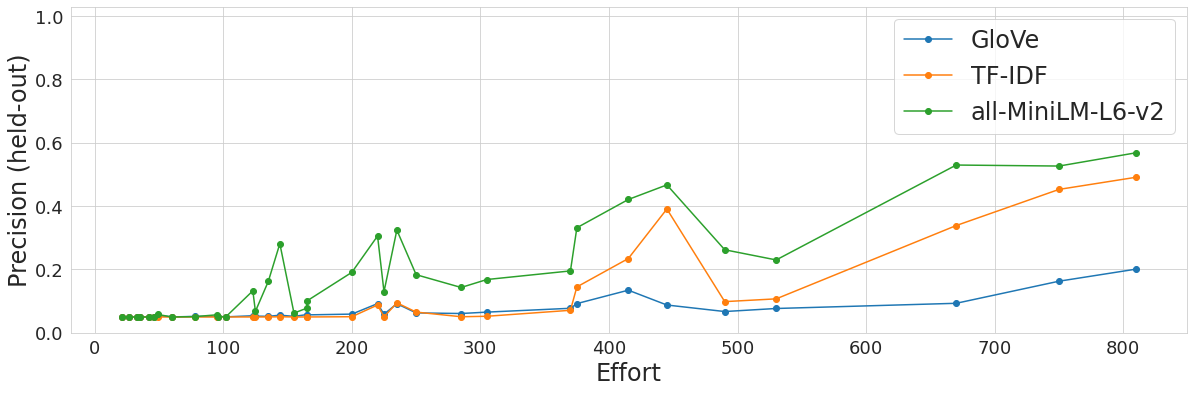

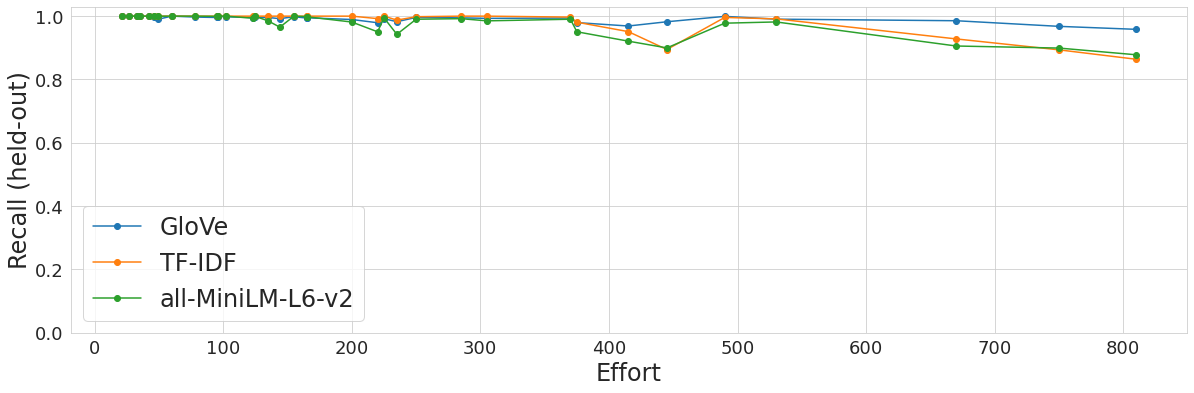

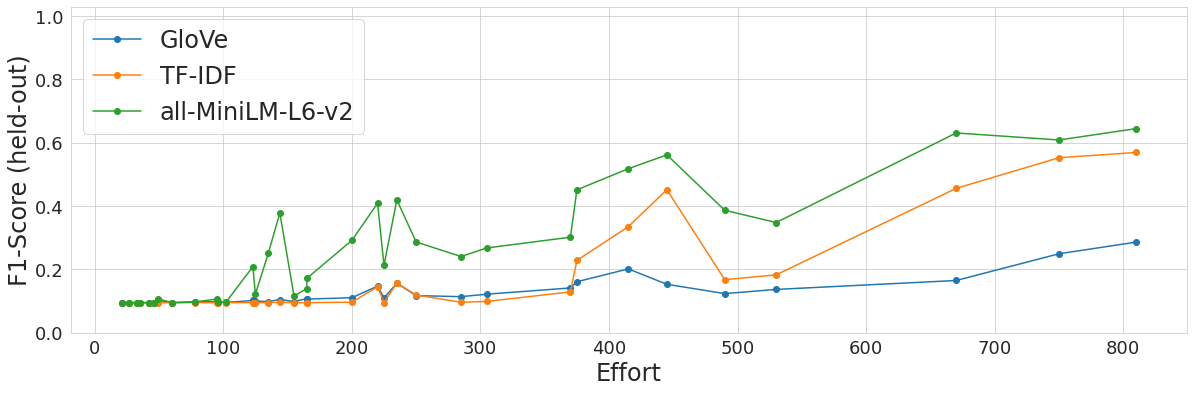

In [12]:
x_axis = 'Effort'
sns.set_style('whitegrid')

representation2label = {'bow': 'TF-IDF', 'glove': 'GloVe', 'sbert': 'all-MiniLM-L6-v2'}

for metric in ['Precision (held-out)', 'Recall (held-out)', 'F1-Score (held-out)']:
# for metric in ['Precision (test)', 'Recall (test)', 'F1-Score (test)']:
    fig, ax = plt.subplots(1, figsize=(20,6))
    for representation in set(average_df['Representation']):
        auxdf = average_df[average_df['Representation']==representation]
        auxdf=auxdf.sort_values(by='Effort')
        x = auxdf['Effort']
        y = auxdf[metric]
        ax.plot(x,y, label=representation2label[representation], marker='o')

    ax.set_ylim(0,1.03)
    ax.set_xlabel(x_axis, fontsize=24)
    ax.set_ylabel(metric, fontsize=24)
    ax.legend(fontsize=24)

    ax.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig(os.path.join(repository_path, 'results', 'figures', f'ng20_representation_simulation_figures_{metric}.jpg'), bbox_inches='tight')
